# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


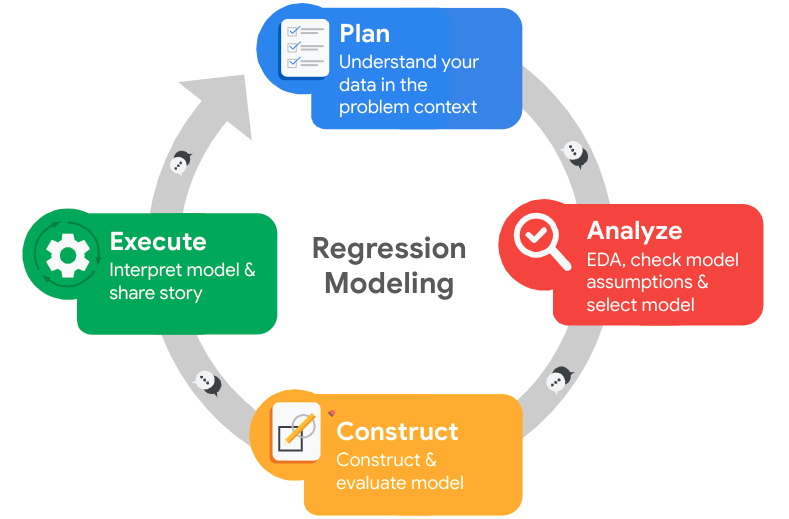

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
path = "D://Pulkit//2017 Class-XII//Jupyter//Google Advanced Data Analytics Professional Certificate//" + \
       "3 - Go Beyond Numbers - Translate Data into Insights//Datasets//"
df = pd.read_csv(path + "HR_capstone_dataset.csv")
df0 = df.copy()

# Display first few rows of the dataframe
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
print(df.columns)

df.rename(columns={"average_montly_hours": "average_monthly_hours"}, inplace=True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Check duplicates

Check for any duplicate entries in the data.

In [6]:
# Check for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [7]:
# Inspect some rows containing duplicates as needed
df[df == df.iloc[-1,:]].dropna()

satisfaction_level  last_evaluation  number_project  \
1962                 0.37             0.52             2.0   
14998                0.37             0.52             2.0   

       average_monthly_hours  time_spend_company  Work_accident  left  \
1962                   158.0                 3.0            0.0   1.0   
14998                  158.0                 3.0            0.0   1.0   

       promotion_last_5years Department salary  
1962                     0.0    support    low  
14998                    0.0    support    low

In [8]:
# Drop duplicates and save
df.drop_duplicates(inplace=True)

# Display first few rows of new dataframe as needed
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB
None


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Check outliers

Check for outliers in the data.

<AxesSubplot: >

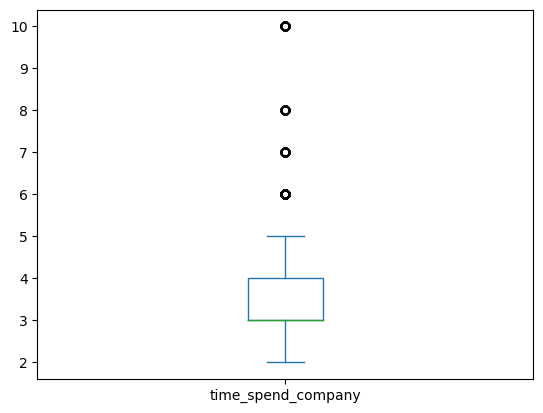

In [9]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
df.time_spend_company.plot.box()

In [10]:
# Determine the number of rows containing outliers
print("Number of rows containing outliers in tenure are", sum(df.time_spend_company > 5))

# Compute the 25th percentile value in `tenure`
p25 = np.percentile(df.time_spend_company, 25)

# Compute the 75th percentile value in `tenure`
p75 = np.percentile(df.time_spend_company, 75)

# Compute the interquartile range in `tenure`
iqr = p75-p25
print(f"Inter Quartile Range is {iqr} year/s")

# Define the upper limit and lower limit for non-outlier values in `tenure`
ll = p25 - 1.5 * iqr
ul = p75 + 1.5 * iqr
print(f"Limits are: {ll} to {ul} years")

# Identify subset of data containing outliers in `tenure`
df[(df.time_spend_company < ll) | (df.time_spend_company > ul)].head()

Number of rows containing outliers in tenure are 824
Inter Quartile Range is 1.0 year/s
Limits are: 1.5 to 5.5 years


satisfaction_level  last_evaluation  number_project  \
1                 0.80             0.86               5   
17                0.78             0.99               4   
34                0.84             0.87               4   
47                0.57             0.70               3   
67                0.90             0.98               4   

    average_monthly_hours  time_spend_company  Work_accident  left  \
1                     262                   6              0     1   
17                    255                   6              0     1   
34                    246                   6              0     1   
47                    273                   6              0     1   
67                    264                   6              0     1   

    promotion_last_5years   Department  salary  
1                       0        sales  medium  
17                      0        sales     low  
34                      0           hr     low  
47                      0      support     low  
67                      0  product_mng  medium

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pace: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [11]:
# Get numbers of people who left vs. stayed
print(df.left.value_counts())

# Get percentages of people who left vs. stayed
df.left.value_counts()/len(df)

0    10000
1     1991
Name: left, dtype: int64


0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

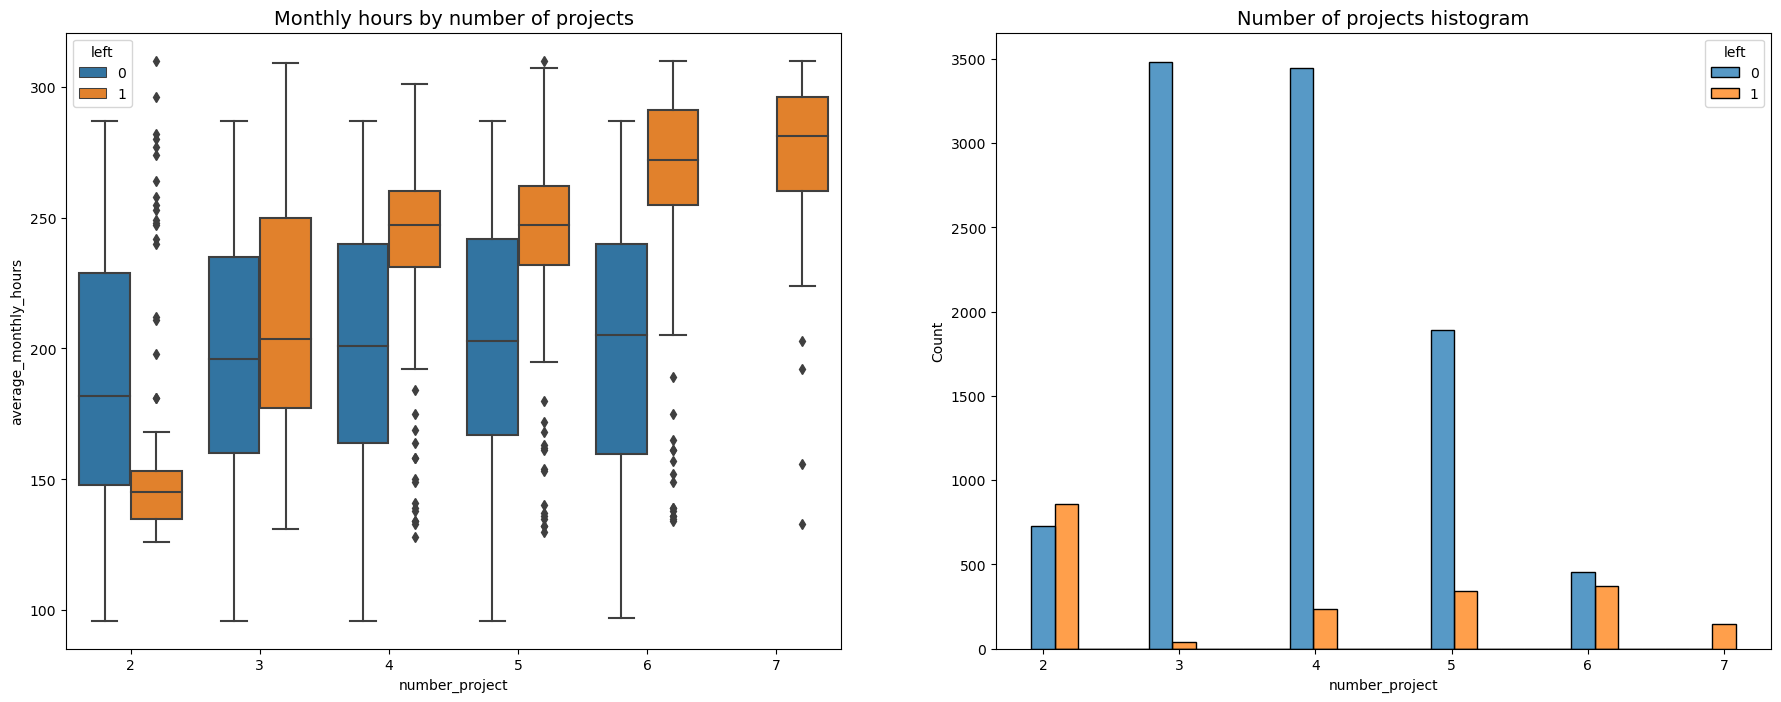

In [12]:
# Create a plot as needed 
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(df, x='number_project', y='average_monthly_hours', hue='left', ax=ax[0])
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()



<details>
    <summary>
There are many observations we could make from this plot.
    </summary>

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/week—much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.
</details>

- Employees having higher projects and higher average working hours mostly leave.
- Those having 3-5 projects tend to continue with the company.
- Those having higher average monthly hours tend to leave.
- Those with few projects appear to be new joinees. Those who did't worked enough appear to be fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door.
- Assuming a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working 5 days a weekk and 8 hours daily = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this (200+ hours). It seems that employees here are overworked.

In [13]:
# Get value counts of stayed/left for employees with 7 projects
df.loc[df.number_project == 7, "left"].value_counts()

1    145
Name: left, dtype: int64

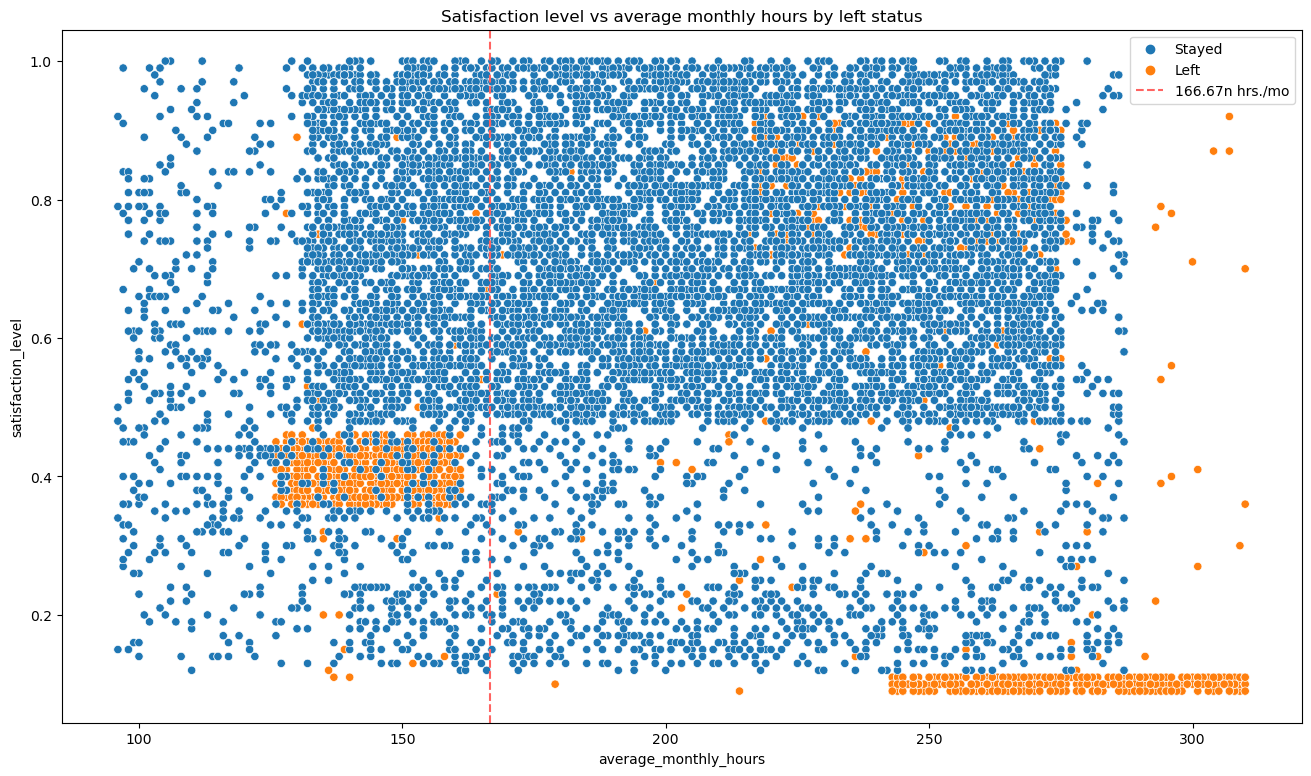

In [14]:
# Create a plot as needed
plt.figure(figsize=(16, 9))

ax = sns.scatterplot(df, x="average_monthly_hours", y="satisfaction_level", hue="left")

# Plotting Ideal Average Monthly hours line
plt.axvline(x=166.67, color='#ff6361', label='166.67hrs./mo', ls='--')

# Addding Labels
handles,_ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Stayed','Left', '166.67n hrs./mo'], loc="upper right")

# Adding Title
plt.title("Satisfaction level vs average monthly hours by left status")
plt.show()

<details>
    <summary>
        Scatterplot Inferences
    </summary>
The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.
    </details>

- A lot of employees worked more than ideal work hours ie most of them overworked.
- Those with higher working hours had lower satisfaction levels and likely left the company themselves.
- There were another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

- Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

- The strange shape of the distributions here is indicative of data manipulation or synthetic data.

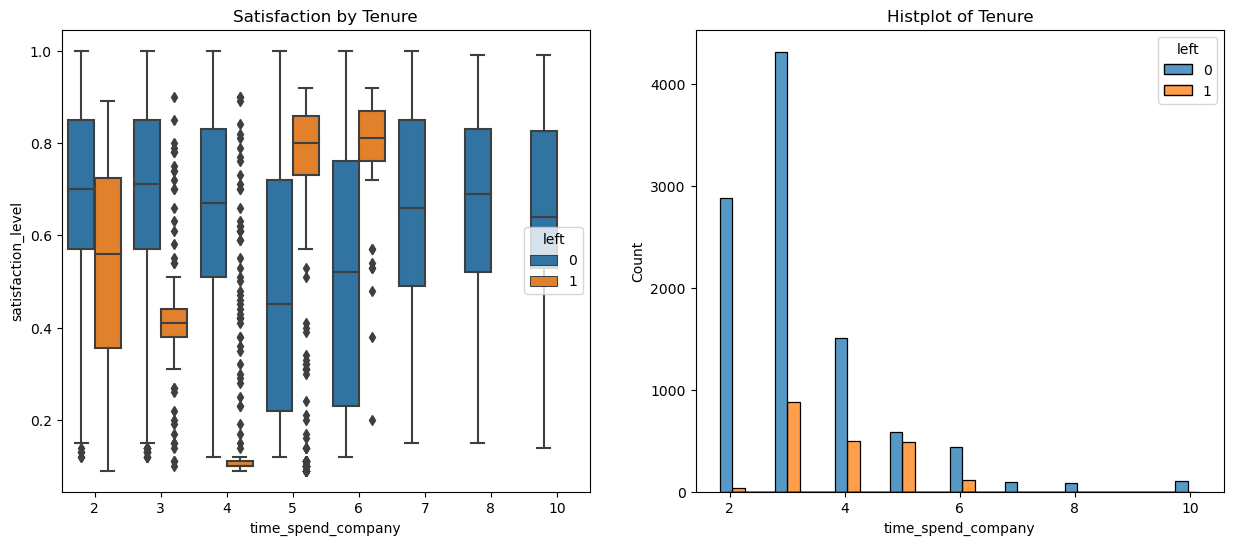

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(df, x="time_spend_company", y="satisfaction_level", hue="left", ax=ax[0])
ax[0].set_title("Satisfaction by Tenure", fontsize=12)

sns.histplot(df, x="time_spend_company", hue="left", multiple="dodge", shrink=5, ax=ax[1])
ax[1].set_title("Histplot of Tenure", fontsize=12)

plt.show()

<details>
    <summary>
There are many observations we could make from this plot.
    </summary>

1. Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
2. Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
3. The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
4. The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.
    </details>

- Those who have spent less than 3 years in the company are likely to stay. Satisfaction score for these employees doesn't really differtiate between those who stay and those who leave.
- Those who have 3-4 years tenure are likely to leave if their satisfaction score is less than 0.5. Maybe there's a major policy change after 4 years that leads to sudden decreas in satisfaction score for some employees.
- Those with 7+ years of tenure are highly unlikely to leave.
- Those with 5-6 years of tenure may leave even if they have high satisfaction score.

In [16]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby('left').satisfaction_level.agg([np.mean,np.median])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, we'll examine salary levels for different tenures.

In [17]:
df.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

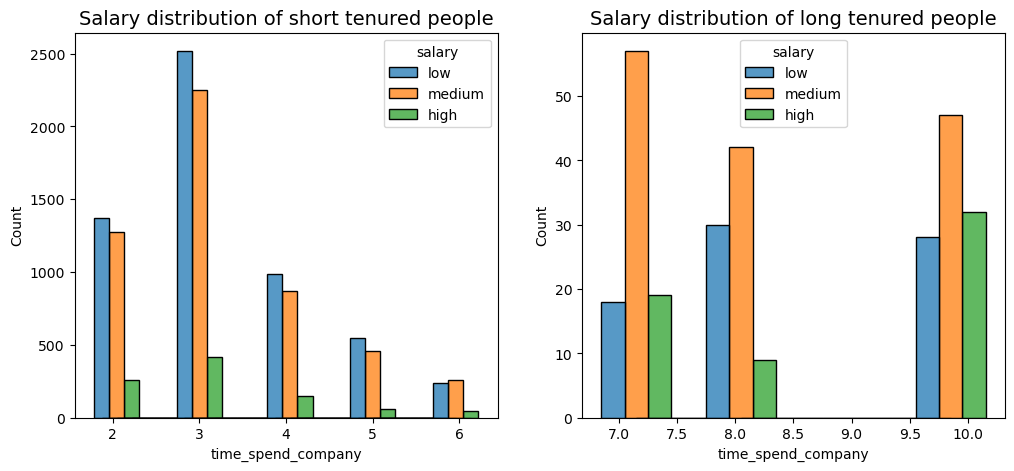

In [18]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Define short-tenured employees
sns.histplot(df[df.time_spend_company < 7], x="time_spend_company", hue="salary", multiple="dodge", shrink=6, ax=ax[0])
ax[0].set_title('Salary distribution of short tenured people', fontsize=14)

# Define long-tenured employees
sns.histplot(df[df.time_spend_company >= 7], x="time_spend_company", hue="salary", multiple="dodge", shrink=2, ax=ax[1],
            hue_order=["low", "medium", "high"])
ax[1].set_title('Salary distribution of long tenured people', fontsize=14)

plt.show()

<details>
    <summary>
The plots above show that 
    </summary>
long-tenured employees were not disproportionately comprised of higher-paid employees.
    </details>

- The salary of most employees is medium
- Employees with short tenure are generally paid low salary
- Employees with long tenure have a higher chance of being paid high salary compared to those with short tenure.
- Even then the salary is not high for a large proportion of long tenured employees. This could lead to employees being reluctant to stick for long with the company.

Next, we'll explore whether there's a correlation between working long hours and receiving high evaluation scores. Lets create a scatterplot of average_monthly_hours versus last_evaluation.

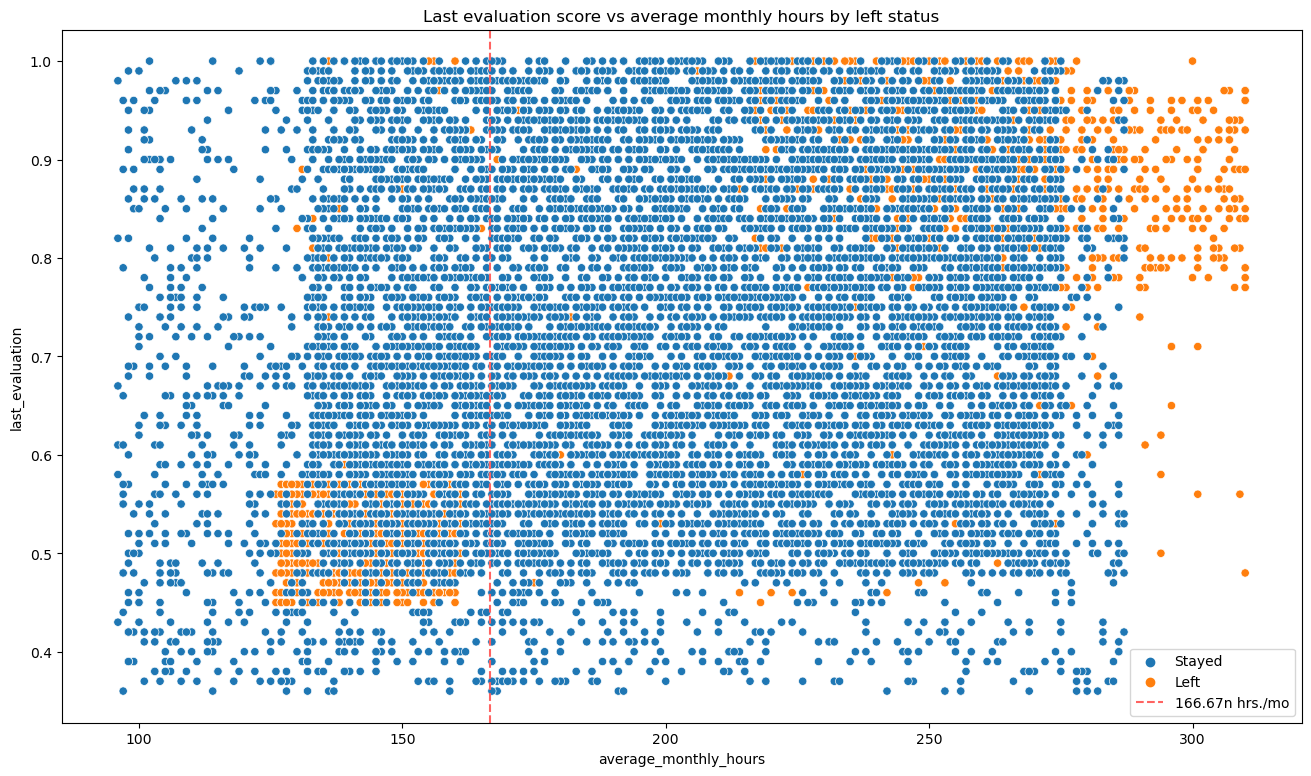

In [19]:
# Create a plot as needed
plt.figure(figsize=(16, 9))

ax = sns.scatterplot(df, x="average_monthly_hours", y="last_evaluation", hue="left")

# Plotting Ideal Average Monthly hours line
plt.axvline(x=166.67, color='#ff6361', label='166.67hrs./mo', ls='--')

# Addding Labels
handles,_ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Stayed','Left', '166.67n hrs./mo'], loc="lower right")

# Adding Title
plt.title("Last evaluation score vs average monthly hours by left status")
plt.show()

<details>
    <summary>
The following observations can be made from the scatterplot above:
    </summary>
1. The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
2. There seems to be a correlation between hours worked and evaluation score.
3. There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
4. Most of the employees in this company work well over 167 hours per month.
    </details>

- Employees with very high working hours usually leave the company even if their evaluation score is high.
- Employees with less working hours (130-160) and low evaluation scores (0.45-0.6) are likely fired.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

In [20]:
df.promotion_last_5years.value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

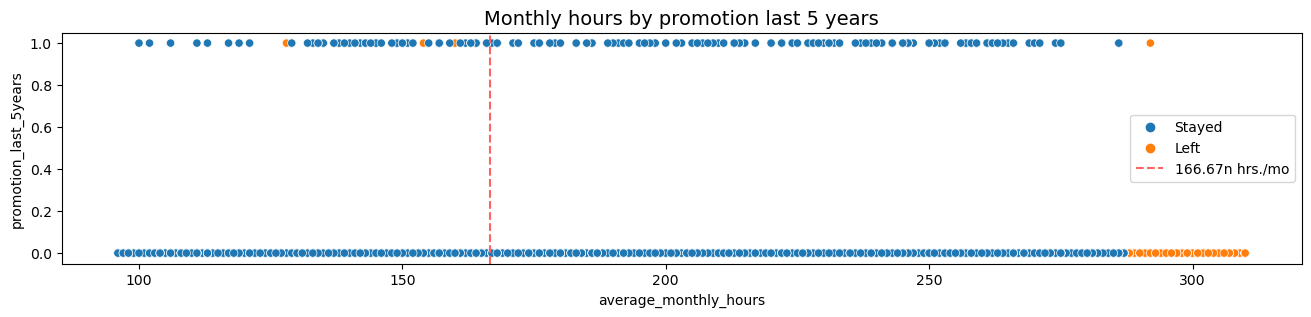

In [21]:
# Create a plot as needed
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df,x='average_monthly_hours', y='promotion_last_5years', hue='left')
plt.axvline(x=166.67, color='#ff6361', ls='--')

handles,_ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Stayed','Left', '166.67n hrs./mo'])

plt.title('Monthly hours by promotion last 5 years', fontsize='14');

<details>
    <summary>
The plot above shows the following:
    </summary>
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  
    </details>

- This clearly shows those with very high working hours (~300) but no promotion leave the company.
- Very few employees who were promoted in the last five years left.
- Very few employees who worked the most hours were promoted

Next, we'll inspect how the employees who left are distributed across departments.

In [22]:
df.left.value_counts()/len(df.left)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [23]:
# Create a plot as needed
df[df.left==1].Department.value_counts()

sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: Department, dtype: int64

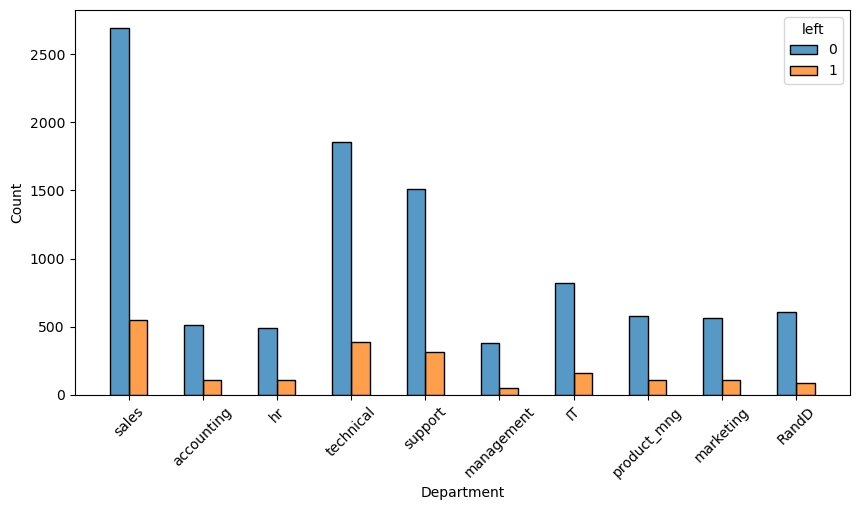

In [24]:
# Create a plot as needed
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Department", hue="left", multiple="dodge", shrink=.5)
plt.xticks(rotation=45);

Lets also plot pie charts to get clearer insights

In [25]:
dep_left_df = df.groupby('Department').left.value_counts()/df.groupby('Department').left.count()
dep_left_df

Department   left
IT           0       0.838115
             1       0.161885
RandD        0       0.877522
             1       0.122478
accounting   0       0.824477
             1       0.175523
hr           0       0.811980
             1       0.188020
management   0       0.880734
             1       0.119266
marketing    0       0.833581
             1       0.166419
product_mng  0       0.839650
             1       0.160350
sales        0       0.830195
             1       0.169805
support      0       0.828666
             1       0.171334
technical    0       0.826203
             1       0.173797
Name: left, dtype: float64

In [26]:
dep_left_df['IT']#.plot.pie(subplots=True);

left
0    0.838115
1    0.161885
Name: left, dtype: float64

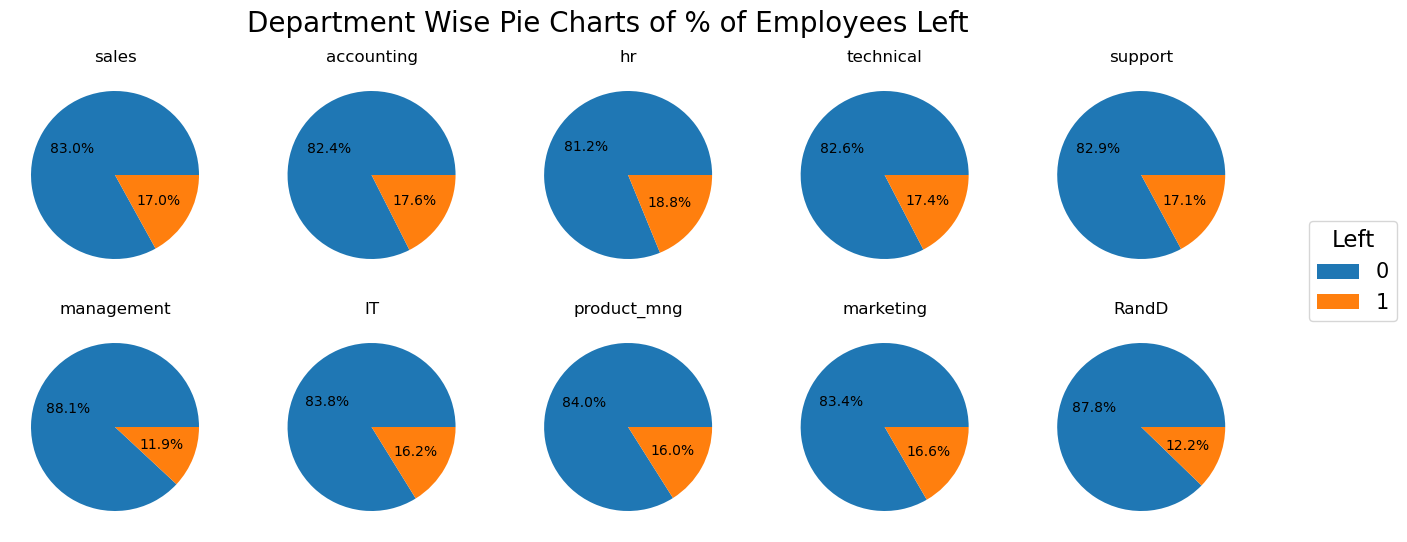

In [27]:
fig, ax = plt.subplots(2, 5 , figsize=(16, 6))

i=j=0
for dep in df.Department.unique():
    ax[i,j].pie(dep_left_df[dep], autopct='%1.1f%%')
    ax[i,j].set_title(dep)
    
    j += 1
    if j>4:
        i += 1
        j = 0

plt.figlegend([0,1], title='Left', fontsize=15, title_fontsize=16.5, loc='center right')
plt.suptitle('Department Wise Pie Charts of % of Employees Left', fontsize=20);

<details>
    <summary>
        From these plots, we find out:
        </summary>
* There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.
    </details>

- Most employees are in sales department and least in management department.
- Management employees are the least likely to leave.
- HR employees are most likely to leave.
- On average 16.6% of employees leave or are fired from the company.
- But these are just minor differences. There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

<AxesSubplot: >

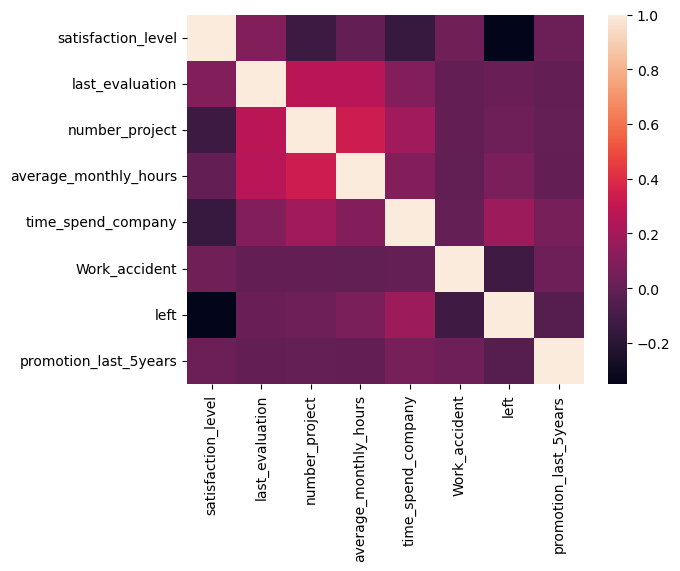

In [28]:
# Plot a correlation heatmap
sns.heatmap(df.corr())

<details>
    <summary>
        Inferences
    </summary>
The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.
    </details>

There is very low corrlation with the left column. With `satisfacton_level` is -0.4 and with `tenure` is 0.2.
Also `number_project`, `last_evaluation` and `average_monthly_hours` are positively correlated with each other.

In [29]:
df.groupby('left').Work_accident.value_counts()

left  Work_accident
0     0                8255
      1                1745
1     0                1886
      1                 105
Name: Work_accident, dtype: int64

No significant relation of `left` with `Work_accident` variable

In [30]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Insights

<details>
    <summary>
        The various insights uncovered from the dataset are:
    </summary>
        It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.
    </details>

- It seems that the employee work culture is not that good. 
- Most employees are overworked still didn't receive any promotion for a long time. 
- Employees have more than average projects. 
- The mean satisfaction score of employees is also on the lower side. 
- Long tenured employees usually didn't have high salaries - leading to tendency to quit after a few years (mostly 4 maybe also due to some policy change at this point). 
- But those who spend 6+ years in the company tend not to leave. 
- The `left` column's correlation with `satisfacton_level` is -0.4 and with `tenure` is 0.2. 
- Also `number_project`, `last_evaluation` and `average_monthly_hours` are positively correlated with each other.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- I'll choose all columns except `last_evaluation` and `Department`.
- Yes most of the model assumptions are met
- I'll use sklearn, stats and numpy

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

* The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company) is categorical, we could either build a Logistic Regression model, or a Tree-based Machine Learning model.

So we could proceed with one of the two following approaches. Or, we could implement both and determine how they compare.

### Modeling

<details>
    <summary>
Modeling Approach A: Logistic Regression Model
    </summary>
This approach covers implementation of Logistic Regression.

Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: department and salary.

department is a categorical variable, which means you can dummy it for modeling.

salary is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.
</details>

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score, precision_score
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

Since logistic regression is quite sensitive to outliers, we'll build two LR models: One with and one without outliers in the `tenure` column.

In [32]:
x = pd.get_dummies(df[["number_project", "average_monthly_hours", "time_spend_company", 
                       "promotion_last_5years", "Work_accident", "satisfaction_level", "salary"]], drop_first=True)
x.head()

number_project  average_monthly_hours  time_spend_company  \
0               2                    157                   3   
1               5                    262                   6   
2               7                    272                   4   
3               5                    223                   5   
4               2                    159                   3   

   promotion_last_5years  Work_accident  satisfaction_level  salary_low  \
0                      0              0                0.38           1   
1                      0              0                0.80           0   
2                      0              0                0.11           0   
3                      0              0                0.72           1   
4                      0              0                0.37           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0

In [33]:
y = df.left

In [34]:
x_ = x[(ll < x.time_spend_company) & (x.time_spend_company < ul)].reset_index(drop=True)
y_ = df.loc[(ll < df.time_spend_company) & (df.time_spend_company < ul), 'left'].reset_index(drop=True)
x_.head()

number_project  average_monthly_hours  time_spend_company  \
0               2                    157                   3   
1               7                    272                   4   
2               5                    223                   5   
3               2                    159                   3   
4               2                    153                   3   

   promotion_last_5years  Work_accident  satisfaction_level  salary_low  \
0                      0              0                0.38           1   
1                      0              0                0.11           0   
2                      0              0                0.72           1   
3                      0              0                0.37           1   
4                      0              0                0.41           1   

   salary_medium  
0              0  
1              1  
2              0  
3              0  
4              0

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=87)
x__train, x__test, y__train, y__test = train_test_split(x_, y_, test_size=0.25, stratify=y_, random_state=87)

In [36]:
lr_con_outliers = LogisticRegression(random_state=93, max_iter=1000)
lr_sin_outliers = LogisticRegression(random_state=93, max_iter=1000)

In [37]:
lr_con_outliers.fit(x_train, y_train)
lr_sin_outliers.fit(x__train, y__train)

LogisticRegression(max_iter=1000, random_state=93)

In [38]:
y_pred = lr_con_outliers.predict(x_test)
y__pred = lr_sin_outliers.predict(x__test)

In [39]:
lr_con_outliers.coef_, lr_sin_outliers.coef_

(array([[-0.25015488,  0.00488265,  0.29567911, -1.08969687, -1.43699005,
         -3.90089124,  1.70648331,  1.32051159]]),
 array([[-4.84087531e-01,  3.50916908e-03,  1.03499623e+00,
         -6.04358517e-01, -1.56739351e+00, -4.50421754e+00,
          1.53936010e+00,  1.11189698e+00]]))

In [40]:
confusion_matrix(y_test, y_pred)

array([[2393,  107],
       [ 399,   99]], dtype=int64)

In [41]:
confusion_matrix(y__test, y__pred)

array([[2194,  127],
       [ 364,  107]], dtype=int64)

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [42]:
print("Con Outliers Scores in order - Accuracy, Precision, Recall, F1: ")
print(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

Con Outliers Scores in order - Accuracy, Precision, Recall, F1: 
0.8312208138759173 0.48058252427184467 0.19879518072289157 0.28125


In [43]:
print("Con Outliers Scores in order - Accuracy, Precision, Recall, F1: ")
print(accuracy_score(y__test, y__pred), precision_score(y__test, y__pred), recall_score(y__test, y__pred), f1_score(y__test, y__pred))

Con Outliers Scores in order - Accuracy, Precision, Recall, F1: 
0.8241404011461319 0.45726495726495725 0.22717622080679406 0.30354609929078014


* Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

* Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [44]:
# Create classification report for logistic regression model
target_names = ['predicted would not leave','Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

predicted would not leave       0.86      0.96      0.90      2500
    Predicted would leave       0.48      0.20      0.28       498

                 accuracy                           0.83      2998
                macro avg       0.67      0.58      0.59      2998
             weighted avg       0.79      0.83      0.80      2998



In [45]:
# Create classification report for logistic regression model
print(classification_report(y__test, y__pred, target_names=target_names))

                           precision    recall  f1-score   support

predicted would not leave       0.86      0.95      0.90      2321
    Predicted would leave       0.46      0.23      0.30       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.59      0.60      2792
             weighted avg       0.79      0.82      0.80      2792



In [46]:
y.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [47]:
y_.value_counts()

0    9285
1    1882
Name: left, dtype: int64

<details>
There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.
    </details>

The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

**Modeling Approach B: Tree-based Model**
This approach covers implementation of Decision Tree and Random Forest.

In [233]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**Decision tree - Round 1**

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [167]:
tree1 = DecisionTreeClassifier(random_state=83)
params = {
    'max_depth': [4, 8],
    'min_samples_split': [2, 8],
    'min_samples_leaf': [2, 8]
}

scoring = {'accuracy','precision','recall','f1','roc_auc'}

In [168]:
gtree1 = GridSearchCV(tree1, param_grid=params, scoring=scoring, cv=5, refit='roc_auc')

In [169]:
gtree1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=83),
             param_grid={'max_depth': [4, 8], 'min_samples_leaf': [2, 8],
                         'min_samples_split': [2, 8]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'precision', 'f1', 'recall'})

In [170]:
gtree1.best_score_

0.9656914562336796

In [171]:
gtree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [65]:
pd.DataFrame(gtree1.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'params', 'split0_test_roc_auc', 'split1_test_roc_auc',
       'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc',
       'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc',
       'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy',
       'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy',
       'std_test_accuracy', 'rank_test_accuracy', 'split0_test_precision',
       'split1_test_precision', 'split2_test_precision',
       'split3_test_precision', 'split4_test_precision', 'mean_test_precision',
       'std_test_precision', 'rank_test_precision', 'split0_test_f1',
       'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'split4_test_f1',
       'mean_test_f1', 'std_test_f1', 'rank_test_f1', 'split0_test_recall',
       'split1_test_recall', 'split2_test_r

In [187]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or roc_auc
  
    Returns a pandas df with the f1, recall, precision, accuracy, and roc_auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    cols = ['mean_test_' + m for m in ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']]
    results = pd.DataFrame(cv_results.loc[cv_results['mean_test_' + metric].argmax(), cols]).reset_index(drop=True).transpose()
    results.insert(0, 'Model', model_name)
    
    return results.rename(columns={0:'F1', 1:'Recall', 2:'Precision', 3:'Accuracy', 4:'ROC_AUC'}).reset_index(drop=True)

In [188]:
results = make_results('Decision Tree GScv', gtree1, 'roc_auc')
results

Model        F1    Recall Precision  Accuracy   ROC_AUC
0  Decision Tree GScv  0.895042  0.916287   0.87494  0.964306  0.965691

All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

**Random Forest**

In [174]:
rf1 = RandomForestClassifier(random_state=95)

In [175]:
params_rf1 = {
    'n_estimators': [100, 500],
    'max_depth': [5, None],
    'max_samples': [0.7, 1.0],
    'min_samples_split': [1, 4],
    'min_samples_leaf': [1, 8],
    'max_features': [1.0]
}

g_rf1 = GridSearchCV(rf1, param_grid=params_rf1, scoring=scoring, cv=4, refit='roc_auc')

In [177]:
# %%time
# g_rf1.fit(x_train, y_train)

C:\Users\pulki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
64 fits failed out of a total of 128.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pulki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pulki\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\pulki\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pulki\anaconda3\lib\site-packages\j

CPU times: total: 3min 11s
Wall time: 3min 13s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=95),
             param_grid={'max_depth': [5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 8],
                         'min_samples_split': [1, 4],
                         'n_estimators': [100, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'precision', 'f1', 'recall'})

In [178]:
# pickle
import pickle

# with open('Salifort Motors g_rf1.pkl', 'wb') as f:
#    pickle.dump(g_rf1, f)

In [ ]:
# with open('Salifort Motors g_rf1.pkl', 'rb') as f:
#    g_rf1 = pickle.load(f)

In [179]:
g_rf1.best_score_

0.9790748500618868

In [180]:
g_rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [181]:
results =  pd.concat([results, make_results('Random Forest GScv', g_rf1, 'roc_auc')]).reset_index(drop=True)
results

model        F1    Recall Precision  Accuracy   ROC_AUC
0  Decision Tree GScv  0.895042  0.916287   0.87494  0.964306  0.965691
1  Random Forest GScv  0.926822  0.916947  0.937125  0.975981  0.979075

In [189]:
results =  pd.concat([results, make_results('Random Forest GScv', g_rf1, 'roc_auc')]).reset_index(drop=True)
results

Model        F1    Recall Precision  Accuracy   ROC_AUC
0  Decision Tree GScv  0.895042  0.916287   0.87494  0.964306  0.965691
1  Random Forest GScv  0.926822  0.916947  0.937125  0.975981  0.979075

The evaluation scores of the random forest model are better than those of the decision tree model. This indicates that the random forest model outperforms the decision tree model.

Next, we can evaluate the final model on the test set.

In [190]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''
    y_predicted = model.predict(X_test_data)
    
    return pd.DataFrame(index=[0], data={
        'Model': model_name, 'F1':f1_score(y_test_data, y_predicted), 'Recall': recall_score(y_test_data, y_predicted), 
        'Precision': precision_score(y_test_data, y_predicted), 'Accuracy': accuracy_score(y_test_data, y_predicted), 
        'Roc_auc': roc_auc_score(y_test_data, y_predicted)})

In [191]:
get_scores('Random Forest GScv', g_rf1, x_test, y_test)

Model        F1    Recall  Precision  Accuracy   Roc_auc
0  Random Forest GScv  0.935484  0.931727   0.939271  0.978652  0.959863

The test scores are very similar to the validation scores, which is good. This appears to be a strong model.
Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseen data.

# Feature Engineering

It might be seem skeptical due to the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

You could proceed by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature overworked. It will be a binary variable.

In [203]:
x_new = x.drop(columns=['satisfaction_level', 'average_monthly_hours'])
x_new['overworked'] = x.average_monthly_hours > 175
x_new.head()

number_project  time_spend_company  promotion_last_5years  Work_accident  \
0               2                   3                      0              0   
1               5                   6                      0              0   
2               7                   4                      0              0   
3               5                   5                      0              0   
4               2                   3                      0              0   

   salary_low  salary_medium  overworked  
0           1              0       False  
1           0              1        True  
2           0              1        True  
3           1              0        True  
4           1              0       False

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

So we defined being overworked as working more than 175 hours per month on average.

In [202]:
y_new = y

In [207]:
xn_train, xn_test, yn_train, yn_test = train_test_split(x_new, y_new, test_size=0.25, random_state=60)

**Decision tree - Round 2**

In [215]:
tree2 = DecisionTreeClassifier(random_state=83)
params_tree2 = {
    'max_depth': [4, 8],
    'min_samples_split': [2, 8],
    'min_samples_leaf': [2, 8]
}

scoring = {'accuracy','precision','recall','f1','roc_auc'}

In [221]:
g_tree2 = GridSearchCV(tree2, param_grid=params_tree2, scoring=scoring, cv=5, refit='roc_auc')

In [222]:
g_tree2.fit(xn_train, yn_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=83),
             param_grid={'max_depth': [4, 8], 'min_samples_leaf': [2, 8],
                         'min_samples_split': [2, 8]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'precision', 'f1', 'recall'})

In [223]:
g_tree2.best_score_

0.9562955513440198

In [224]:
g_tree2.best_params_

{'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [225]:
results =  pd.concat([results, make_results('FE Decision Tree GScv', g_tree2, 'roc_auc')]).reset_index(drop=True)
results

Model        F1    Recall Precision  Accuracy   ROC_AUC
0     Decision Tree GScv  0.895042  0.916287   0.87494  0.964306  0.965691
1     Random Forest GScv  0.926822  0.916947  0.937125  0.975981  0.979075
2  FE Decision Tree GScv  0.825632  0.848649  0.804785  0.940845  0.956296

**Random forest - Round 2**

In [209]:
rf2 = RandomForestClassifier(random_state=95)

In [210]:
params_rf2 = {
    'n_estimators': [100, 500],
    'max_depth': [5, None],
    'max_samples': [0.7, 1.0],
    'min_samples_split': [1, 4],
    'min_samples_leaf': [1, 8],
    'max_features': [1.0]
}

g_rf2 = GridSearchCV(rf2, param_grid=params_rf2, scoring=scoring, cv=4, refit='roc_auc')

In [211]:
# %%time
# g_rf2.fit(xn_train, yn_train)

C:\Users\pulki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
64 fits failed out of a total of 128.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pulki\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pulki\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\pulki\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\pulki\anaconda3\lib\site-packages\j

CPU times: total: 2min 2s
Wall time: 2min 4s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=95),
             param_grid={'max_depth': [5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 8],
                         'min_samples_split': [1, 4],
                         'n_estimators': [100, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'accuracy', 'precision', 'f1', 'recall'})

In [212]:
# pickle
import pickle

# with open('Salifort Motors g_rf2.pkl', 'wb') as f:
#    pickle.dump(g_rf2, f)

In [ ]:
# with open('Salifort Motors g_rf2.pkl', 'rb') as f:
#    g_rf2 = pickle.load(f)

In [213]:
g_rf2.best_score_

0.9609924687698068

In [214]:
g_rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'n_estimators': 500}

In [227]:
results =  pd.concat([results, make_results('FE Random Forest GScv', g_rf2, 'roc_auc')]).reset_index(drop=True)
results

Model        F1    Recall Precision  Accuracy   ROC_AUC
0     Decision Tree GScv  0.895042  0.916287   0.87494  0.964306  0.965691
1     Random Forest GScv  0.926822  0.916947  0.937125  0.975981  0.979075
2  FE Decision Tree GScv  0.825632  0.848649  0.804785  0.940845  0.956296
3  FE Random Forest GScv  0.829702  0.858784  0.802739  0.941955  0.960992

Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

Score the champion model on the test set now.

In [228]:
get_scores('FE Random Forest GScv', g_rf1, x_test, y_test)

Model        F1    Recall  Precision  Accuracy   Roc_auc
0  FE Random Forest GScv  0.935484  0.931727   0.939271  0.978652  0.959863

This seems to be a stable, well-performing final model.

Plot a confusion matrix to visualize how well it predicts on the test set.

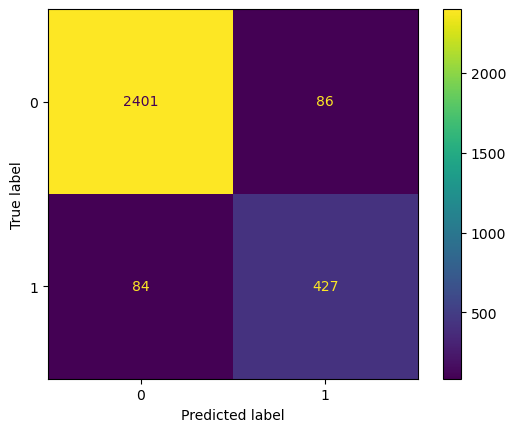

In [232]:
cm = confusion_matrix(yn_test, g_rf2.predict(xn_test), labels=g_rf2.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=g_rf2.classes_)
disp.plot()

The model predicts almost equal false positives and false negatives, and the numbers are small. Thus this is a strong model.

For exploratory purpose, lets inspect the splits of the decision tree model and the most important features in the random forest model.

**Decision tree splits**

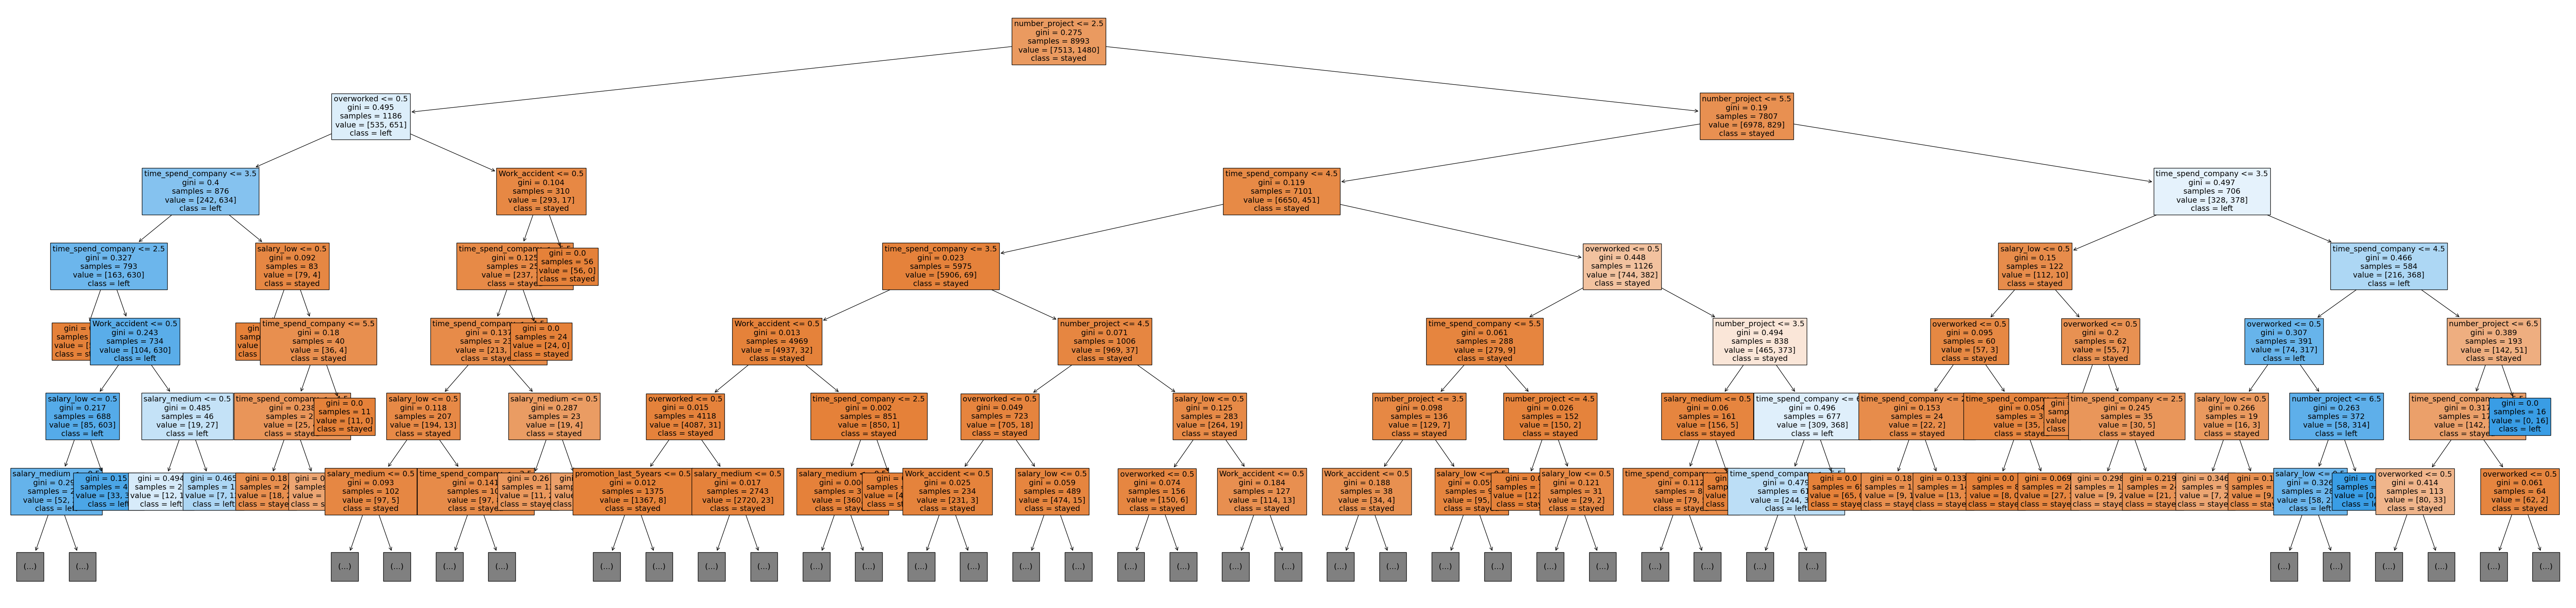

In [246]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(g_tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=x_new.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [247]:
plt.savefig('Best_tree_plot.png')

<Figure size 640x480 with 0 Axes>

**Feature Importances**

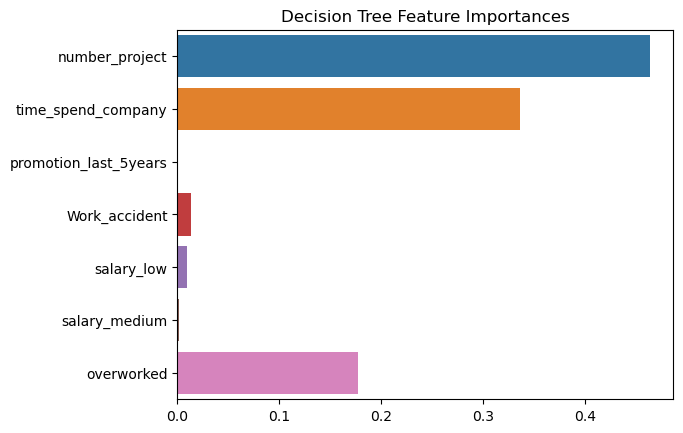

In [251]:
# tree2_importances 
sns.barplot(x=g_tree2.best_estimator_.feature_importances_, y=x_new.columns)
plt.title('Decision Tree Feature Importances');

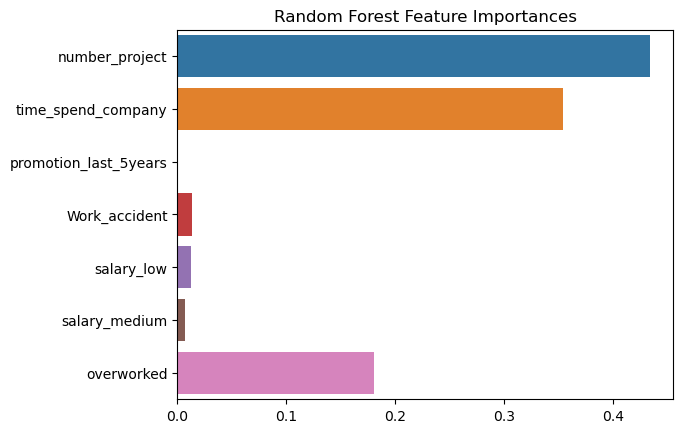

In [250]:
# Get feature importances
sns.barplot(x=g_rf2.best_estimator_.feature_importances_, y=x_new.columns)
plt.title('Random Forest Feature Importances');

The plot above shows that in these models, `number_project`, `time_spend_company`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

# Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**
After conducting feature engineering, the decision tree model achieved AUC of 96%, precision of 93.9%, recall of 93.2%, f1-score of 93.5%, and accuracy of 97.9%, on the test set. 
The random forest modestly outperformed the decision tree model.

✏
## Recall evaluation metrics


- **ROC curve** (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.
- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- Do you have any ethical considerations in this stage?



- That an employee leaving depends highly on the parameters: No. of projects assigned to them, their tenure and if they are overworked or not. In this company the employees are usually overworked, with most employees working for long hours and even then, not getting any promotion. Also inspect what major policy change happens at the end of 4 years as there is a sudden spike in employees leaving at this point.
- To decrease the working hours of the employees and decrease the projects assigned to them.
- To improve the work life quality of employees by decreasing no. of working hours and to provide promotions to overworked and inspect policy at the 4 working years.
- Yes, the model can be improved if more features are provided like work life of employees, extra facilities offered, etc.
- Questions like whether an employee should be promoted, whether an employee should be fired and whether salaries should be increased can be answered from the data.
- To share the true results even if doesn't fit with company expectations and do not artificially modify data/results to please the company.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

#### Logistic Regression
The logistic regression model achieved precision of 79%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

#### Tree-based Machine Learning 
After conducting feature engineering, the decision tree model achieved AUC of 96%, precision of 93.9%, recall of 93.2%, f1-score of 93.5%, and accuracy of 97.9%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

- An employee leaving depends highly on the parameters: No. of projects assigned to them, their tenure and if they are overworked or not. In this company the employees are usually overworked, with most employees working for long hours and even then, not getting any promotion. Also inspect what major policy change happens at the end of 4 years as there is a sudden spike in employees leaving at this point.
- It is recommended to decrease the working hours of the employees and decrease the projects assigned to them.
- Also the work life quality of employees could be increased by decreasing no. of working hours and to provide promotions to overworked and inspect policy at the 4 working years.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.